In [1]:
library(dplyr)
library(ggplot2)
library(psych)
location <- "../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv"
placement.df <- read.csv(location)
library(propogate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




ERROR: Error in library(propogate): there is no package called ‘propogate’


# Summary of dataset

In [2]:
head(placement.df)
summary(placement.df, na.rm = T)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


     sl_no       gender      ssc_p           ssc_b         hsc_p      
 Min.   :  1.0   F: 76   Min.   :40.89   Central:116   Min.   :37.00  
 1st Qu.: 54.5   M:139   1st Qu.:60.60   Others : 99   1st Qu.:60.90  
 Median :108.0           Median :67.00                 Median :65.00  
 Mean   :108.0           Mean   :67.30                 Mean   :66.33  
 3rd Qu.:161.5           3rd Qu.:75.70                 3rd Qu.:73.00  
 Max.   :215.0           Max.   :89.40                 Max.   :97.70  
                                                                      
     hsc_b          hsc_s        degree_p          degree_t   workex   
 Central: 84   Arts    : 11   Min.   :50.00   Comm&Mgmt:145   No :141  
 Others :131   Commerce:113   1st Qu.:61.00   Others   : 11   Yes: 74  
               Science : 91   Median :66.00   Sci&Tech : 59            
                              Mean   :66.37                            
                              3rd Qu.:72.00                            


In [3]:
levels(placement.df$specialisation)
placementds3 <- placement.df %>% filter(specialisation=="Mkt&Fin",mba_p>=72)
placementds3

[1] "Mkt&Fin" "Mkt&HR"

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
20,M,60.00,Others,67.00,Others,Arts,70.00,Comm&Mgmt,Yes,50.48,Mkt&Fin,77.89,Placed,236000
25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000
34,F,87.00,Others,65.00,Others,Science,81.00,Comm&Mgmt,Yes,88.00,Mkt&Fin,72.78,Placed,260000
86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000
126,F,84.00,Central,73.00,Central,Commerce,73.00,Comm&Mgmt,No,75.00,Mkt&Fin,73.33,Placed,350000
166,F,63.30,Central,78.33,Others,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,74.56,Not Placed,NA
168,M,67.90,Others,62.00,Others,Science,67.00,Sci&Tech,Yes,58.10,Mkt&Fin,75.71,Not Placed,NA
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000


In [4]:
mutate(placementds3,avg_p=(degree_p+mba_p)/2) #73.945

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,avg_p
<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<dbl>
20,M,60.00,Others,67.00,Others,Arts,70.00,Comm&Mgmt,Yes,50.48,Mkt&Fin,77.89,Placed,236000,73.945
25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000,76.435
34,F,87.00,Others,65.00,Others,Science,81.00,Comm&Mgmt,Yes,88.00,Mkt&Fin,72.78,Placed,260000,76.890
86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000,76.690
126,F,84.00,Central,73.00,Central,Commerce,73.00,Comm&Mgmt,No,75.00,Mkt&Fin,73.33,Placed,350000,73.165
166,F,63.30,Central,78.33,Others,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,74.56,Not Placed,NA,74.280
168,M,67.90,Others,62.00,Others,Science,67.00,Sci&Tech,Yes,58.10,Mkt&Fin,75.71,Not Placed,NA,71.355
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000,76.045


In [5]:
levels(placement.df$degree_t)

[1] "Comm&Mgmt" "Others"    "Sci&Tech"

In [6]:
placementds1 <- placement.df %>% filter(degree_t=="Sci&Tech",degree_p>=75)
placementds1
arrange(placementds1,degree_p)
placementds2 <- placement.df %>% select(ends_with("_p"),salary)
colnames(placementds2)

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000
25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000
119,M,76.00,Central,80.00,Central,Science,78.00,Sci&Tech,Yes,97.00,Mkt&HR,70.48,Placed,276000
127,F,79.00,Others,61.00,Others,Science,75.50,Sci&Tech,Yes,70.00,Mkt&Fin,68.20,Placed,210000
129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000
153,F,75.40,Others,60.50,Central,Science,84.00,Sci&Tech,No,98.00,Mkt&Fin,65.25,Placed,240000
197,M,72.00,Others,63.00,Others,Science,77.50,Sci&Tech,Yes,78.00,Mkt&Fin,54.48,Placed,250000
198,F,83.96,Others,53.00,Others,Science,91.00,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000


sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<int>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>
127,F,79.00,Others,61.00,Others,Science,75.50,Sci&Tech,Yes,70.00,Mkt&Fin,68.20,Placed,210000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000
197,M,72.00,Others,63.00,Others,Science,77.50,Sci&Tech,Yes,78.00,Mkt&Fin,54.48,Placed,250000
129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000
119,M,76.00,Central,80.00,Central,Science,78.00,Sci&Tech,Yes,97.00,Mkt&HR,70.48,Placed,276000
25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000
153,F,75.40,Others,60.50,Central,Science,84.00,Sci&Tech,No,98.00,Mkt&Fin,65.25,Placed,240000
198,F,83.96,Others,53.00,Others,Science,91.00,Sci&Tech,No,59.32,Mkt&HR,69.71,Placed,260000


[1] "ssc_p"    "hsc_p"    "degree_p" "etest_p"  "mba_p"    "salary"

# Data Visualization

# Bar chart

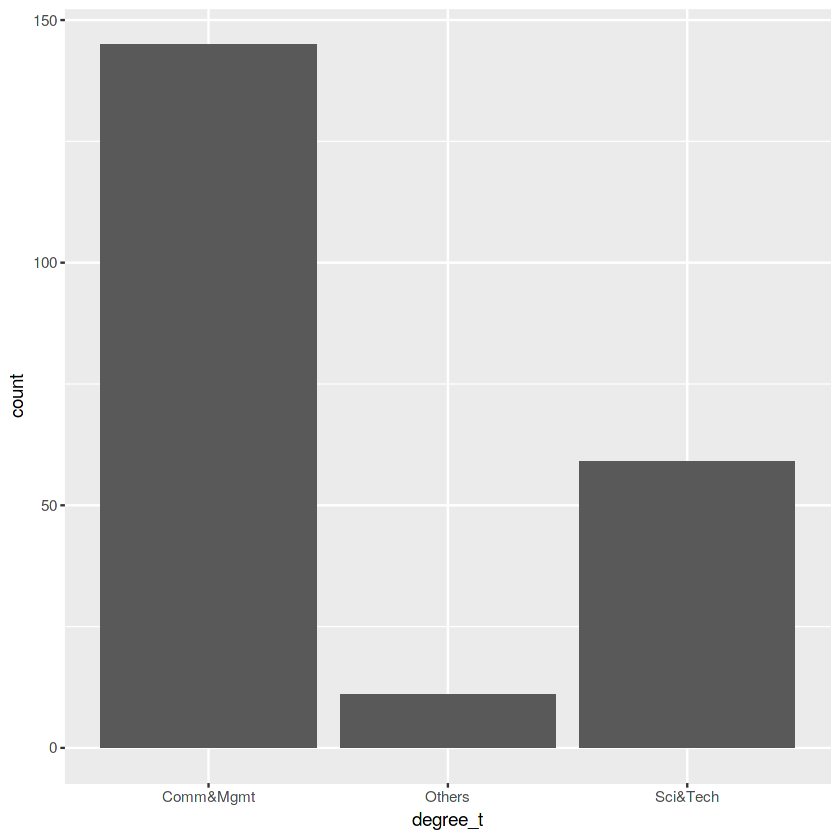

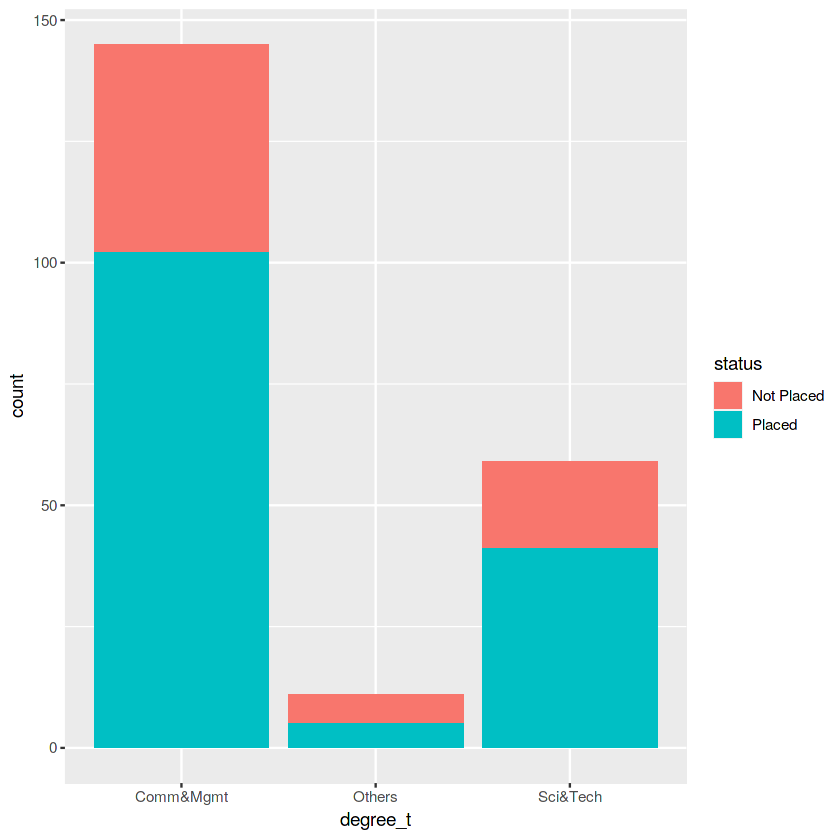

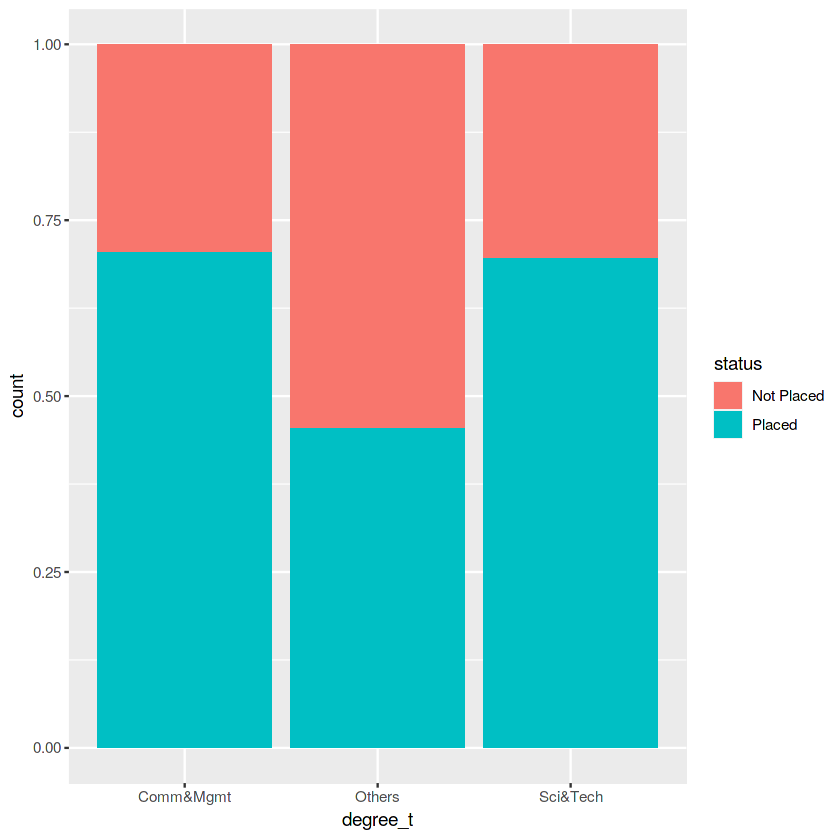

In [7]:
ggplot(placement.df, aes(degree_t)) + geom_bar()
ggplot(placement.df, aes(degree_t)) + geom_bar(aes(fill=status))
ggplot(placement.df, aes(degree_t)) + geom_bar(aes(fill=status), position = "fill")

# Scatterplot matrix, Correlogram

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘GGally’


The following object is masked from ‘package:dplyr’:

    nasa




[1] "sl_no"          "gender"         "ssc_p"          "ssc_b"         
 [5] "hsc_p"          "hsc_b"          "hsc_s"          "degree_p"      
 [9] "degree_t"       "workex"         "etest_p"        "specialisation"
[13] "mba_p"          "status"         "salary"

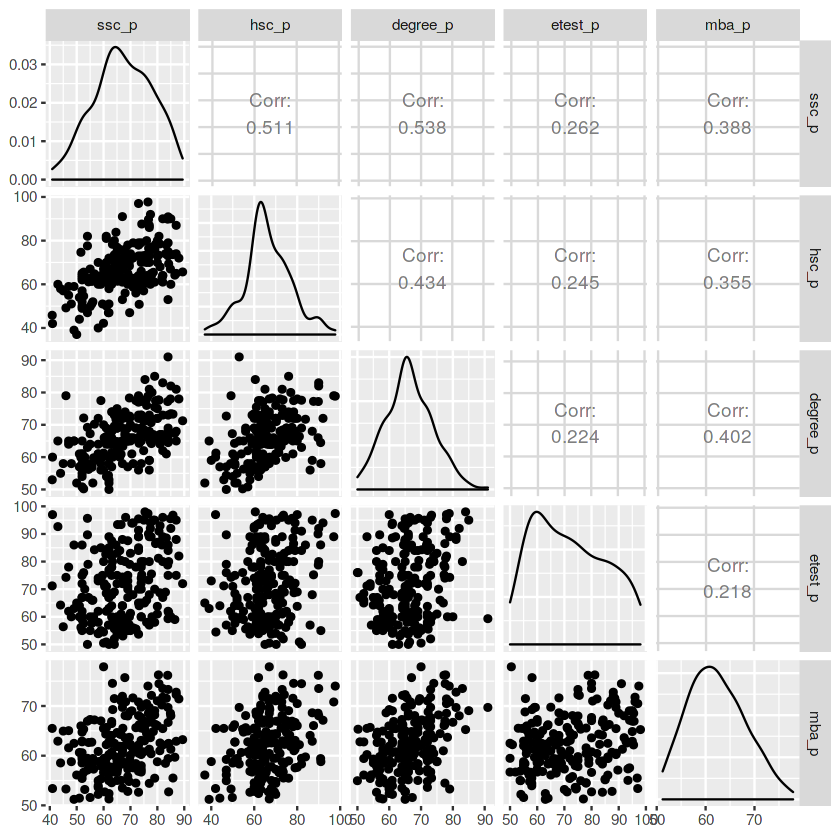

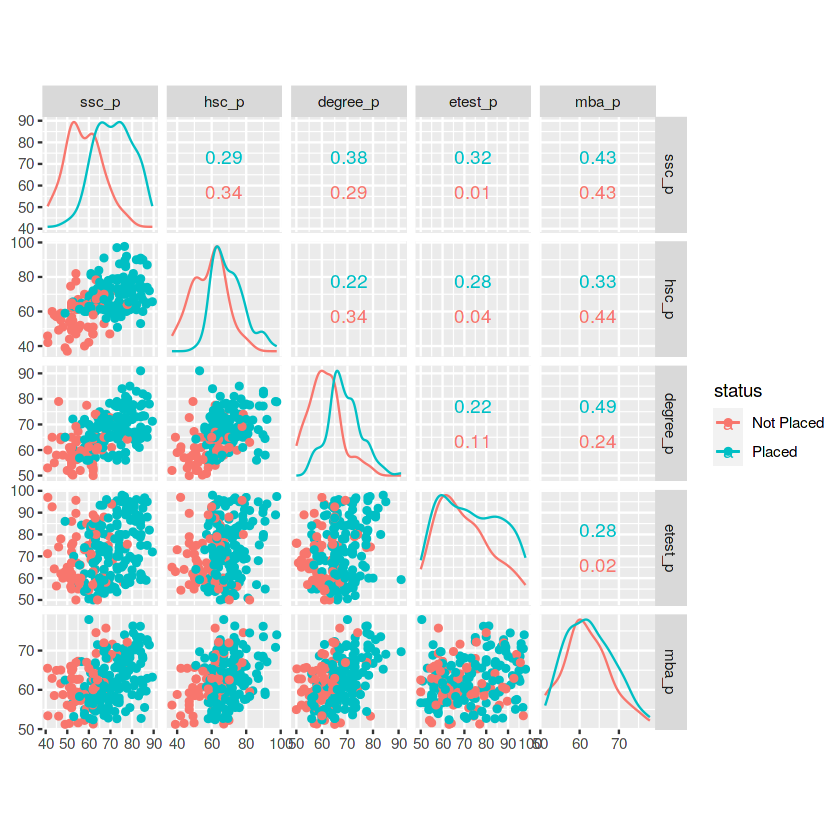

In [8]:
library(GGally)
colnames(placement.df)
ggpairs(placement.df,columns = c(3,5,8,11,13))
ggscatmat(placement.df, columns = c(3,5,8,11,13), color = "status")

# Histogram

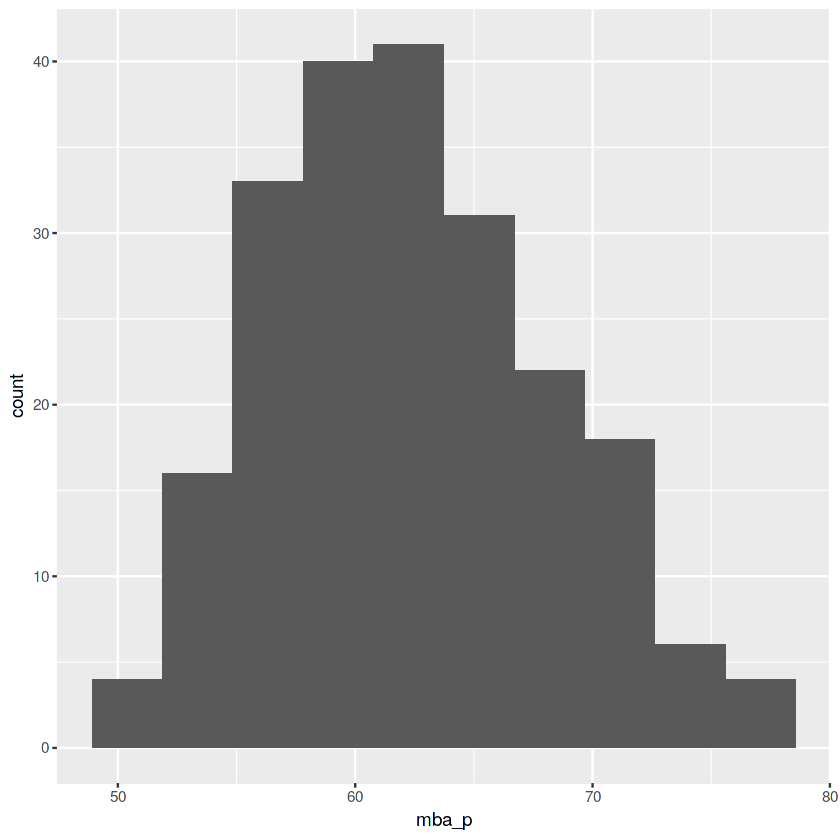

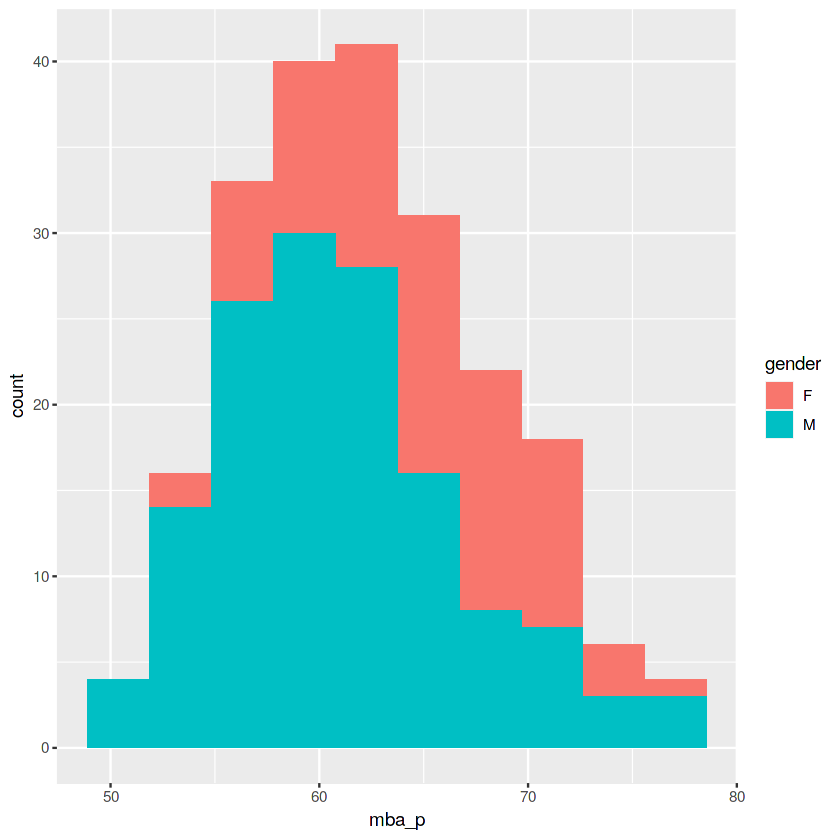

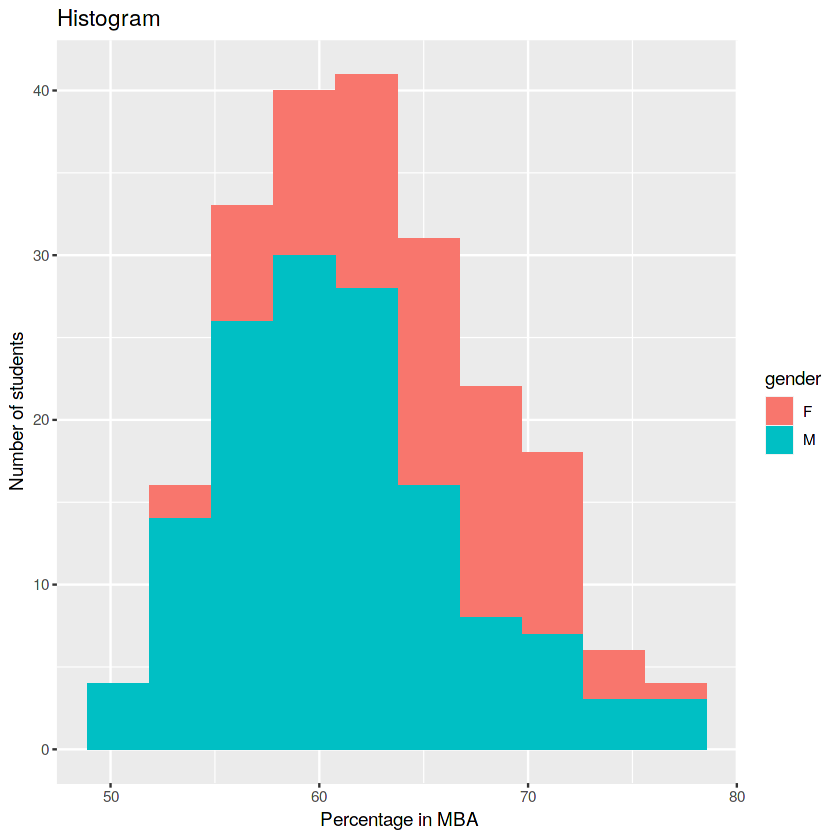

In [9]:

ggplot(placement.df, aes(mba_p)) + geom_histogram(bins = 10)
ggplot(placement.df, aes(mba_p)) + geom_histogram(aes(fill=gender), bins = 10)
ggplot(placement.df, aes(mba_p)) + geom_histogram(aes(fill=gender), bins = 10) +
  labs(title = "Histogram", x = " Percentage in MBA", y = "Number of students")

# Bar chart and Pie chart

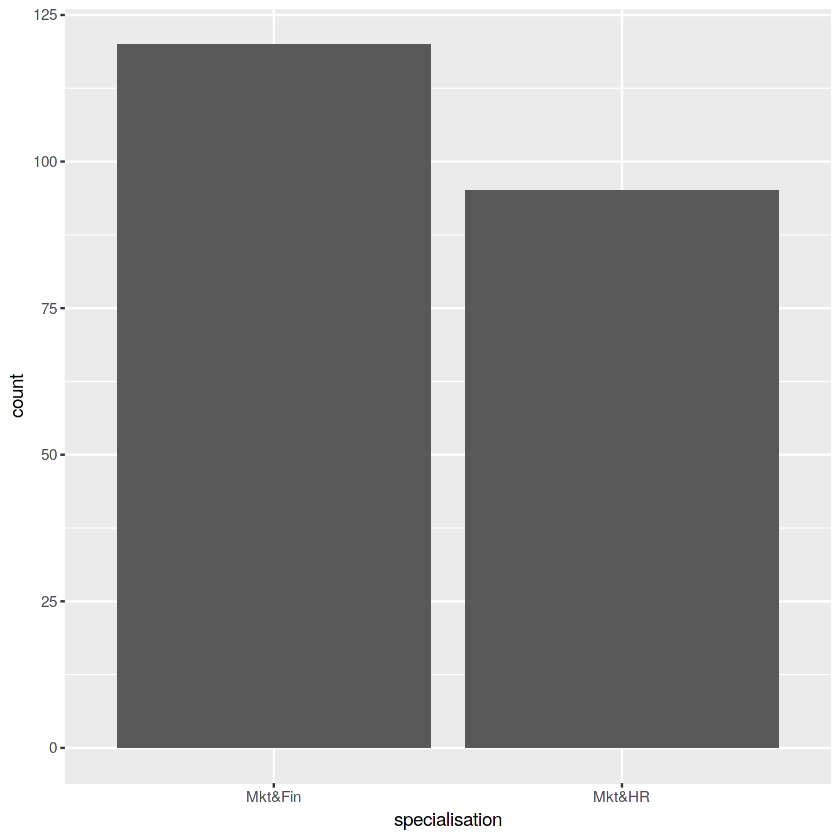

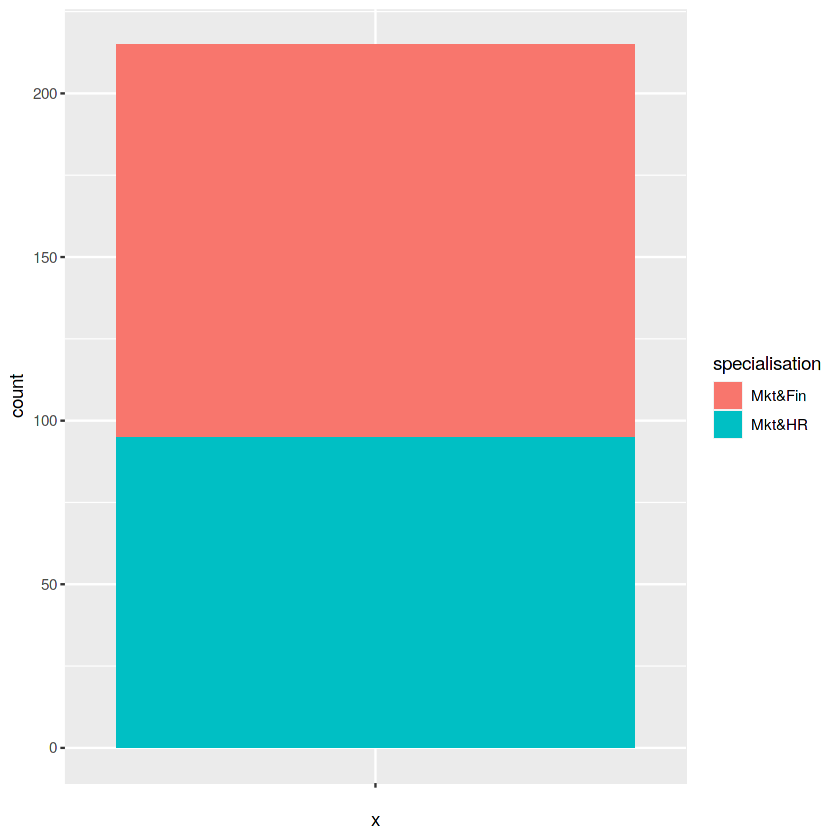

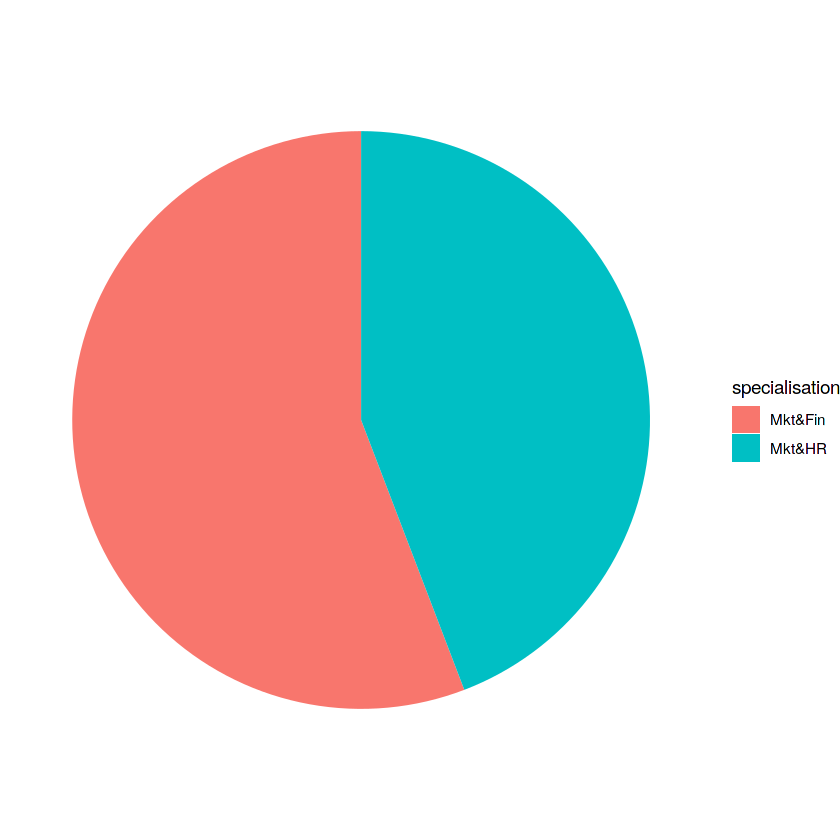

In [10]:
ggplot(placement.df, aes(specialisation)) + geom_bar()
piebar <- ggplot(placement.df, aes(x="", fill=specialisation)) + geom_bar(width = 1)
piebar
piechart <- piebar+coord_polar("y") + theme_void()
piechart

# Scatterplot and Bar chart

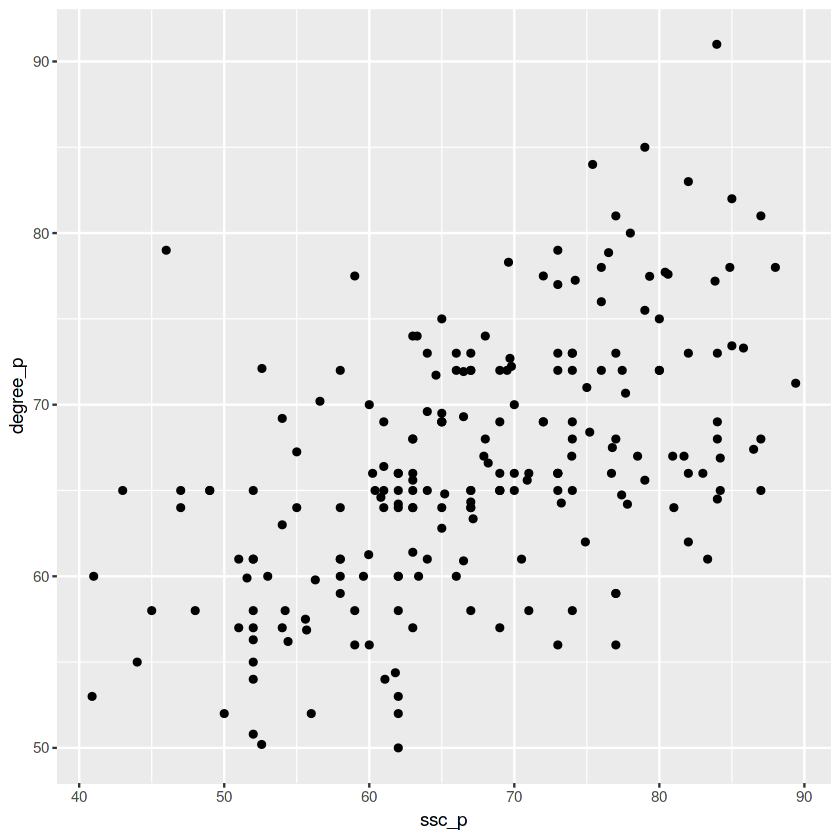

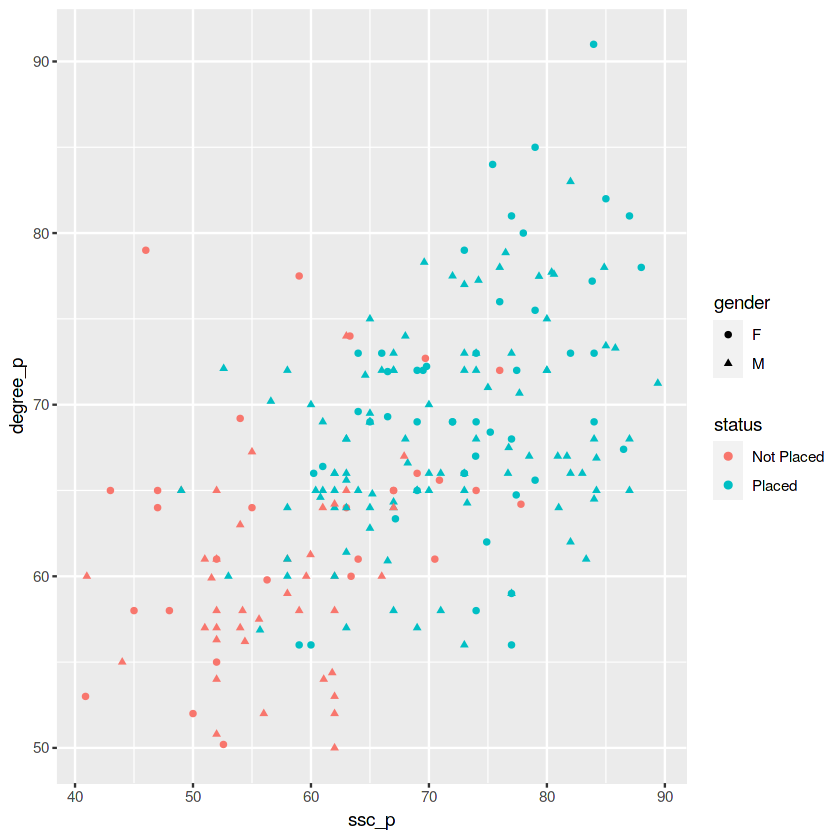

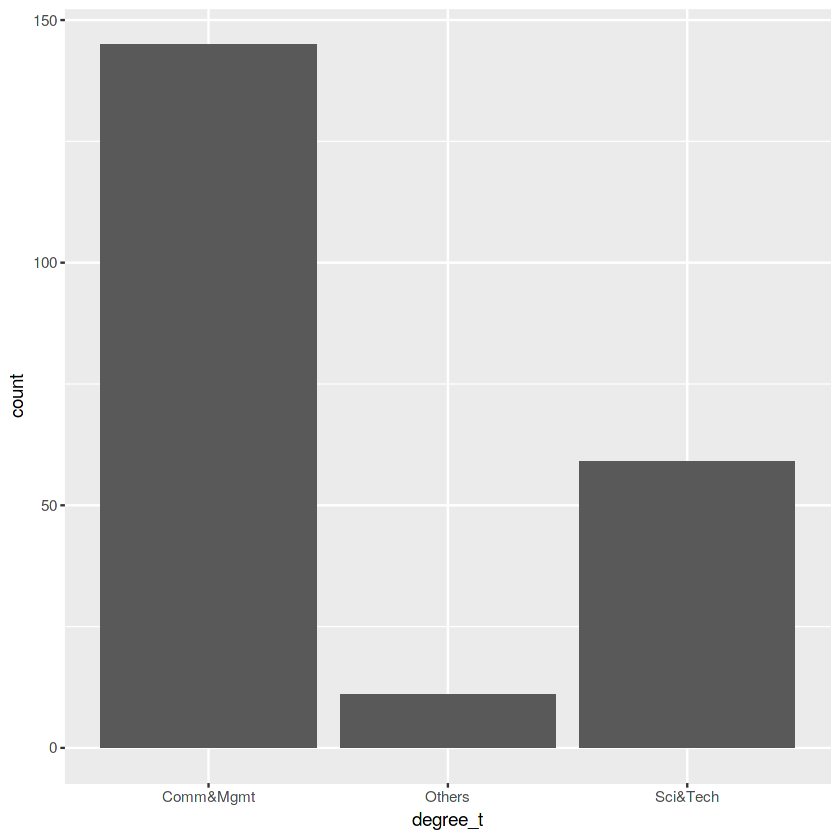

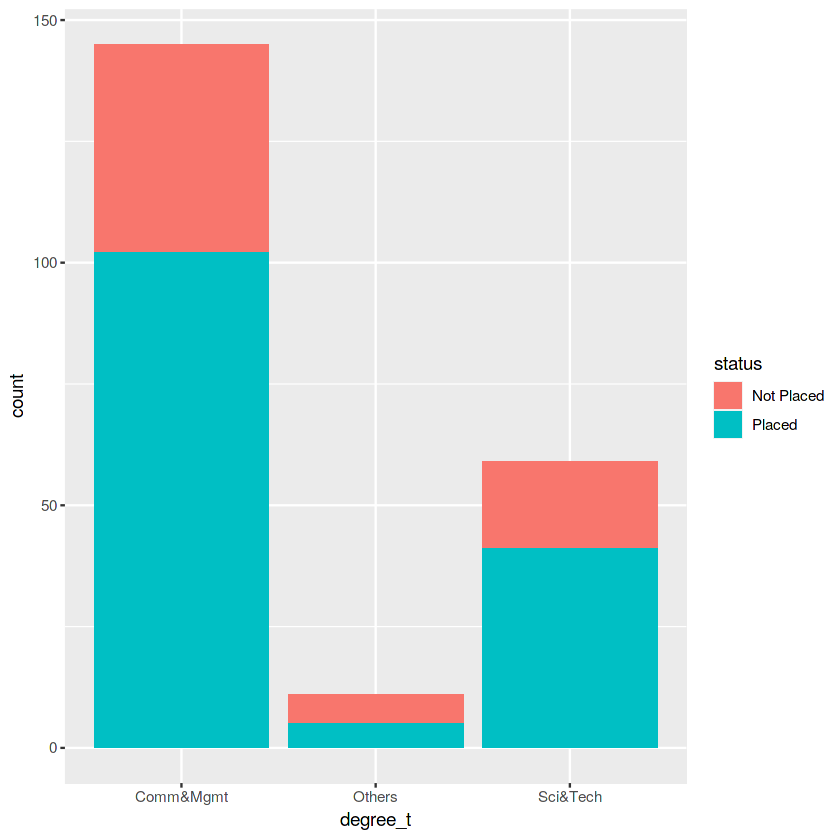

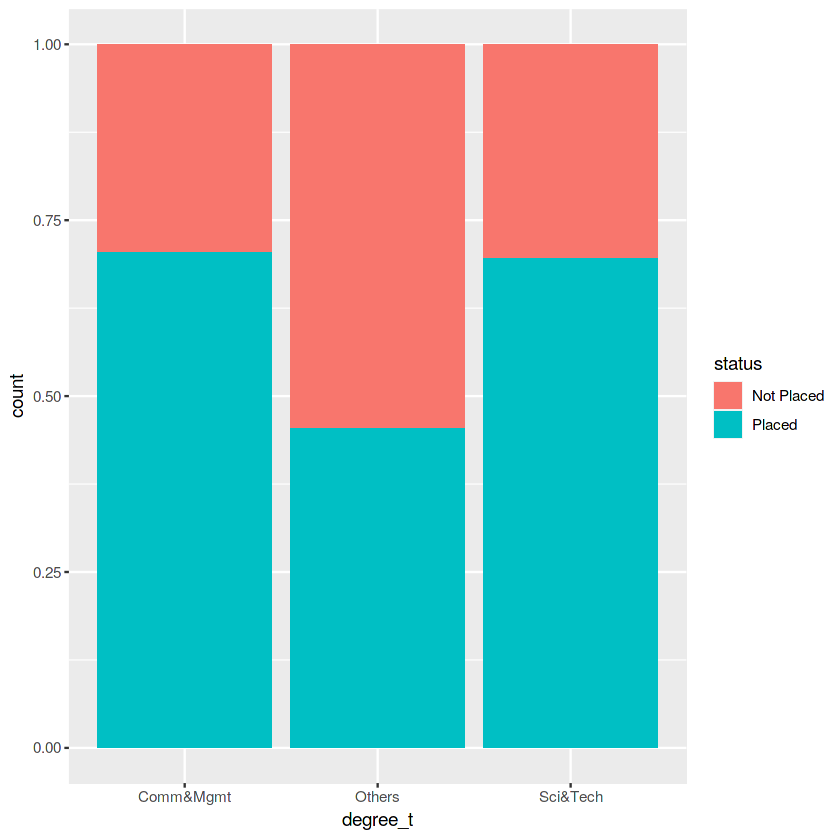

In [11]:
ggplot(placement.df, aes(x=ssc_p, y=degree_p)) + geom_point()
ggplot(placement.df, aes(x=ssc_p, y=degree_p)) + 
  geom_point(aes(color=status, shape=gender))
ggplot(placement.df, aes(degree_t)) + geom_bar()
ggplot(placement.df, aes(degree_t)) + geom_bar(aes(fill=status))
ggplot(placement.df, aes(degree_t)) + geom_bar(aes(fill=status), position = "fill")

# Multiple charts

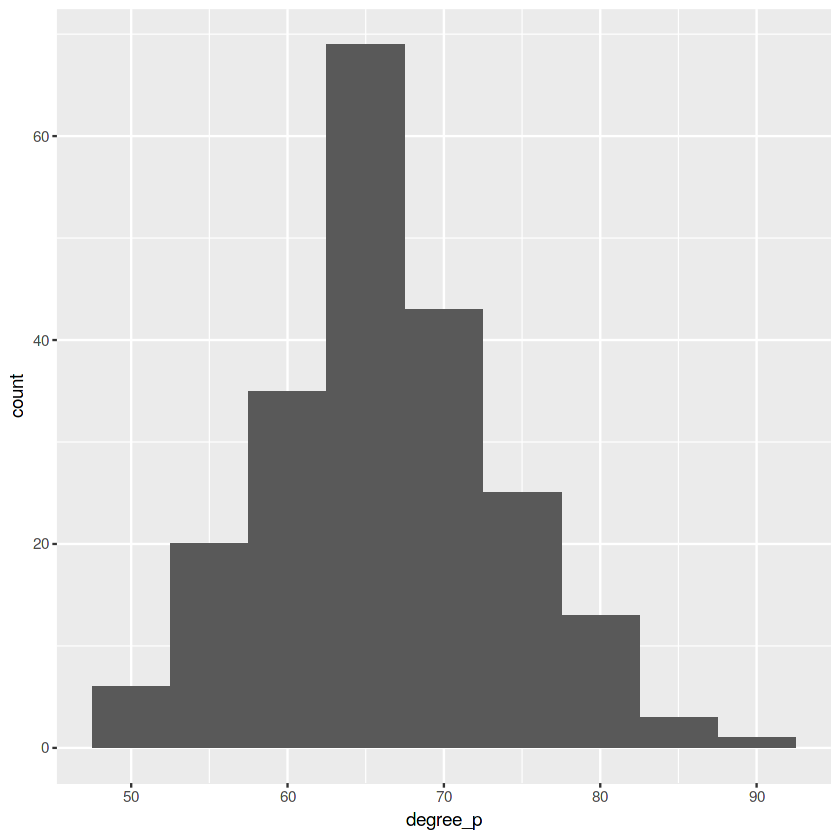

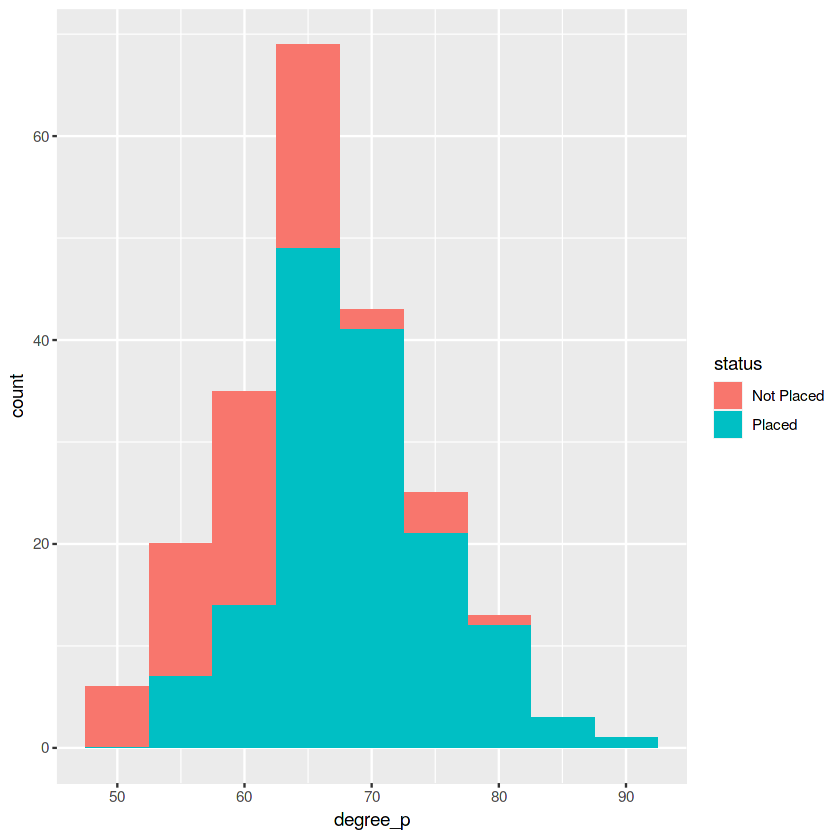

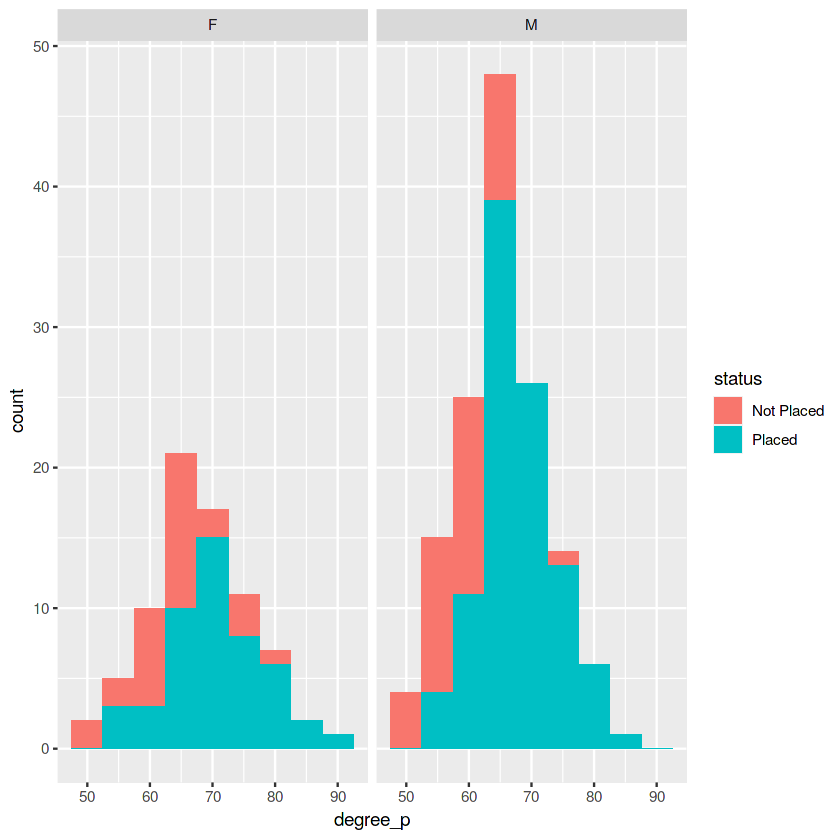

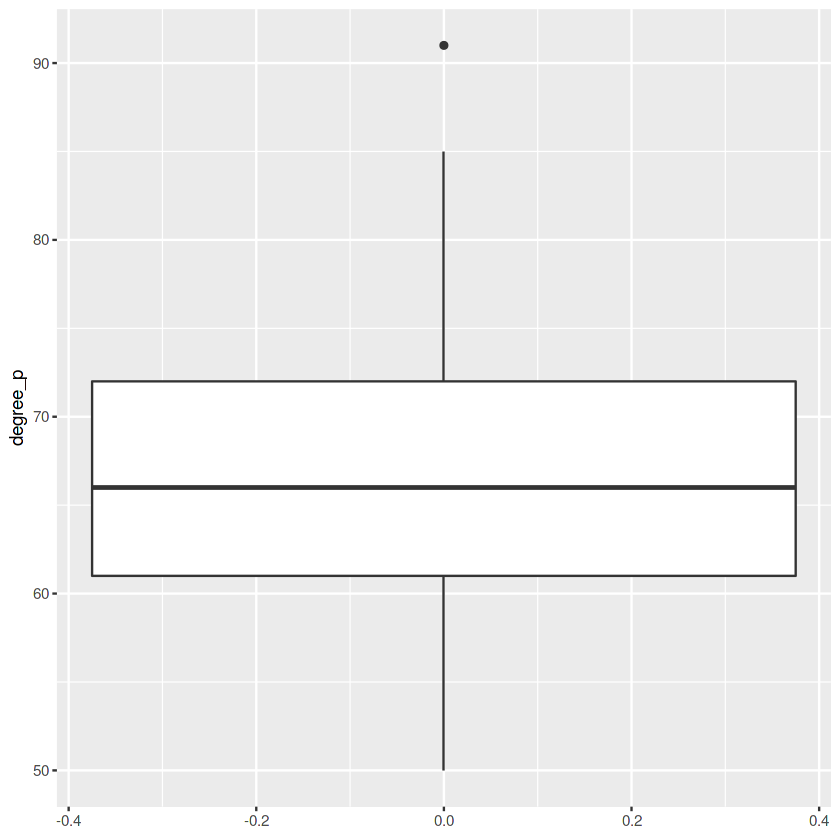

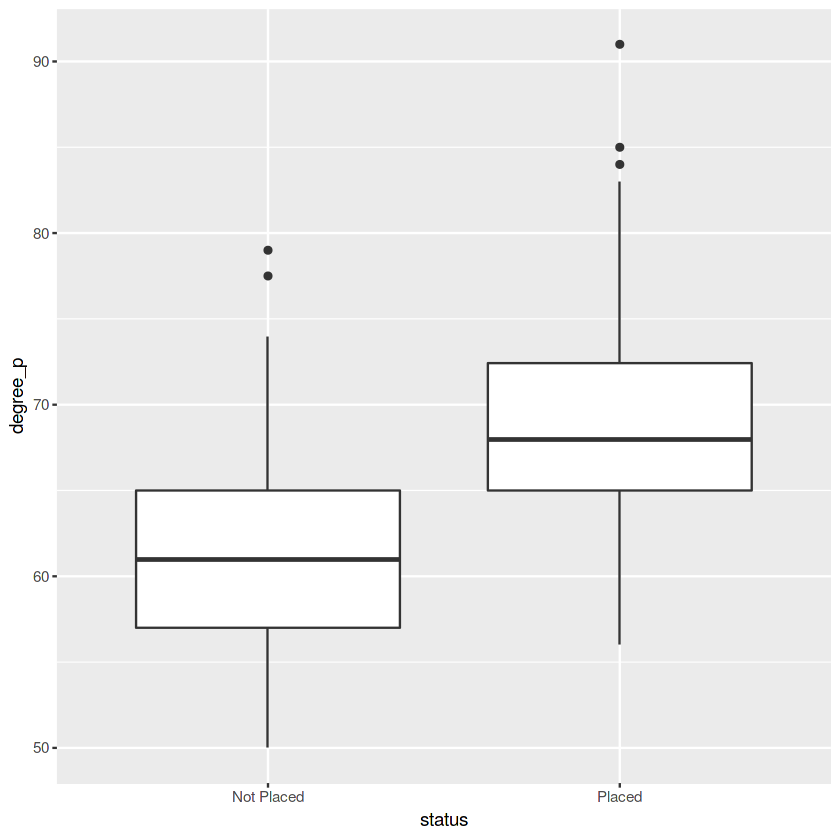

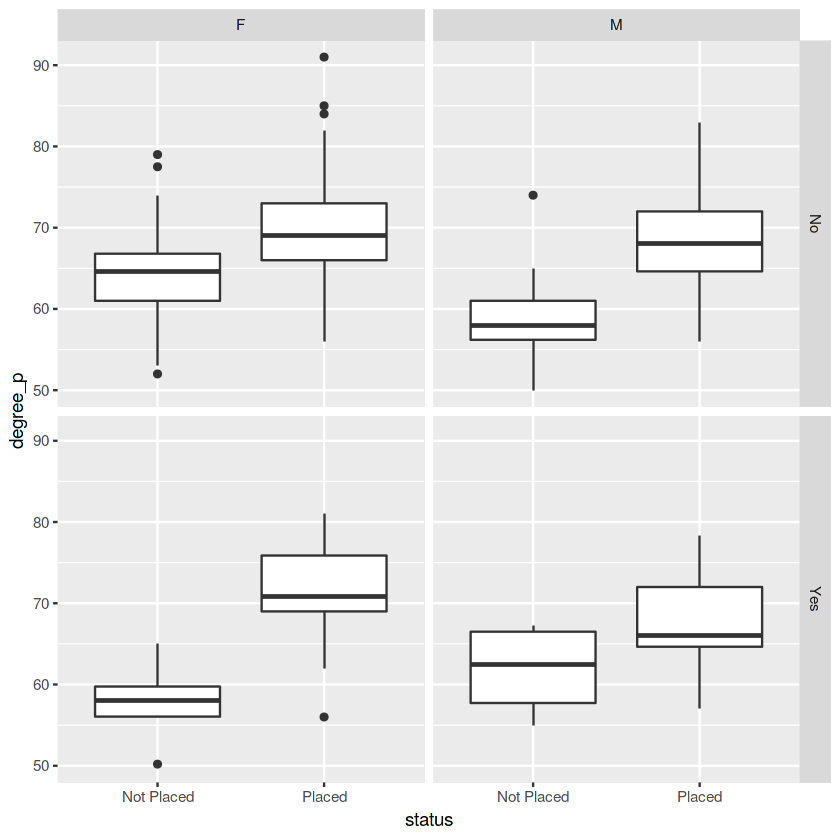

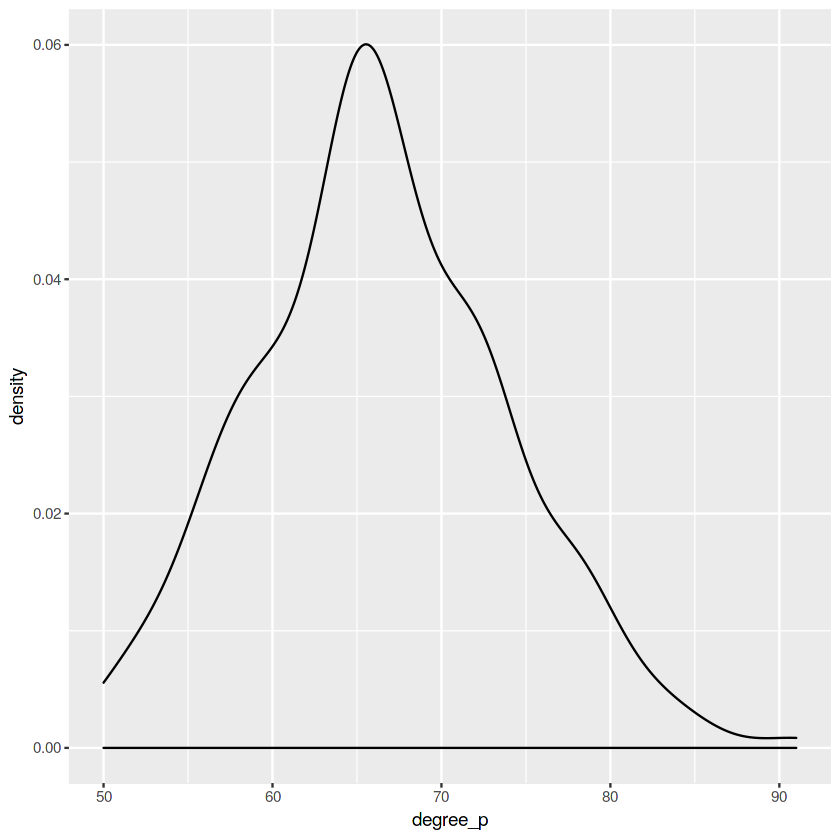

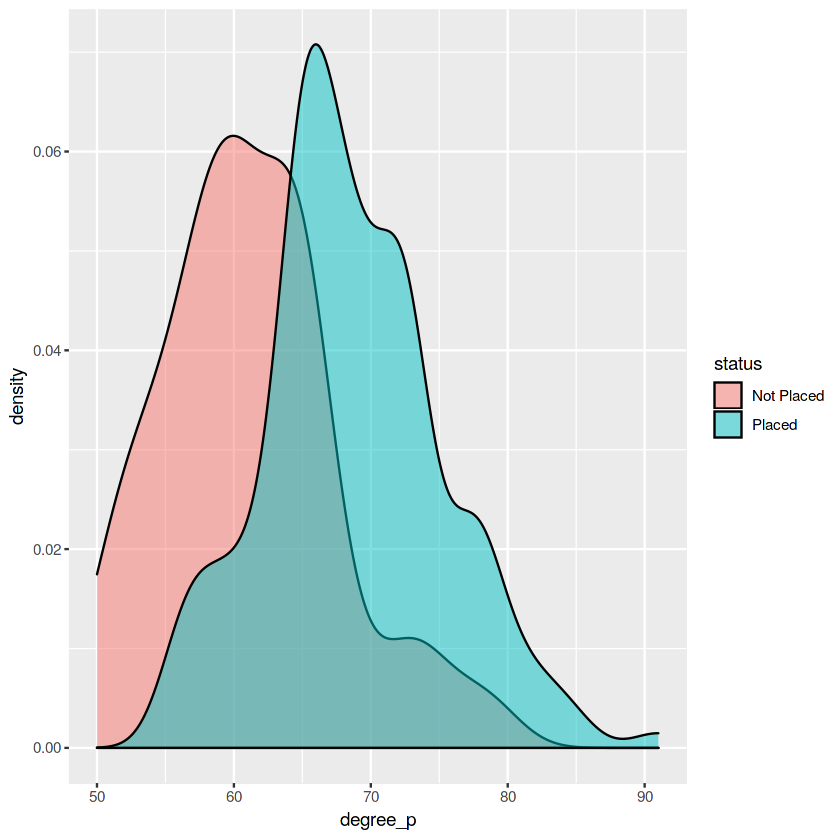

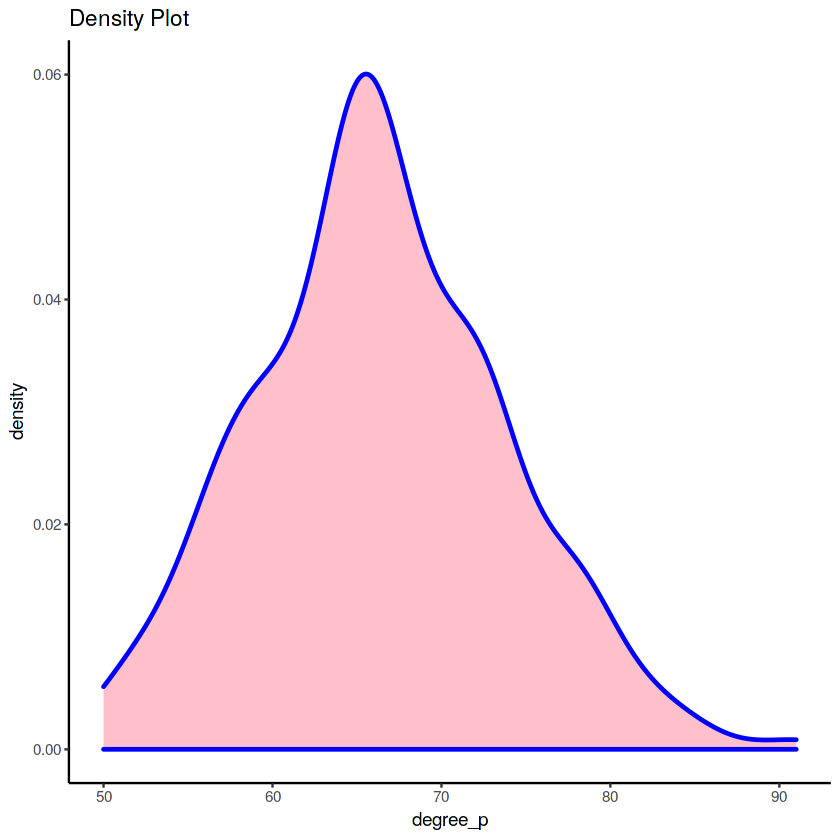

In [12]:
ggplot(placement.df, aes(degree_p)) + 
  geom_histogram(binwidth = 5)
ggplot(placement.df, aes(degree_p)) + 
  geom_histogram(aes(fill=status), binwidth = 5)
ggplot(placement.df, aes(degree_p)) + 
  geom_histogram(aes(fill=status), binwidth = 5) +
  facet_wrap(~gender)
ggplot(placement.df, aes(y=degree_p)) + geom_boxplot()
ggplot(placement.df, aes(y=degree_p)) + geom_boxplot(aes(x=status))
ggplot(placement.df, aes(y=degree_p)) + geom_boxplot(aes(x=status)) +
  facet_grid(workex~gender)
ggplot(placement.df) + geom_density(aes(degree_p))
ggplot(placement.df) + geom_density(aes(degree_p, fill=status), alpha=0.5)
ggplot(placement.df) + geom_density(aes(degree_p), fill="pink", color="blue", size=1) +
  theme_classic() + ggtitle("Density Plot")

# Two-way table

In [13]:
mytab <- table(placement.df$specialisation, placement.df$status)
with(placement.df, table(specialisation, status)) # alternative way
mytab
addmargins(mytab)
prop.table(mytab) # proportion based on total number
prop.table(mytab, margin = 1) # proportions over rows
prop.table(mytab, margin = 2) # proportions over columns

              status
specialisation Not Placed Placed
       Mkt&Fin         25     95
       Mkt&HR          42     53

         
          Not Placed Placed
  Mkt&Fin         25     95
  Mkt&HR          42     53

,Not Placed,Placed,Sum
Mkt&Fin,25,95,120
Mkt&HR,42,53,95
Sum,67,148,215


         
          Not Placed    Placed
  Mkt&Fin  0.1162791 0.4418605
  Mkt&HR   0.1953488 0.2465116

         
          Not Placed    Placed
  Mkt&Fin  0.2083333 0.7916667
  Mkt&HR   0.4421053 0.5578947

         
          Not Placed    Placed
  Mkt&Fin  0.3731343 0.6418919
  Mkt&HR   0.6268657 0.3581081

# Three-way crosstab

, , status = Not Placed

      specialisation
gender Mkt&Fin Mkt&HR
     F       9     19
     M      16     23

, , status = Placed

      specialisation
gender Mkt&Fin Mkt&HR
     F      28     20
     M      67     33


                      status Not Placed Placed
gender specialisation                         
F      Mkt&Fin                        9     28
       Mkt&HR                        19     20
M      Mkt&Fin                       16     67
       Mkt&HR                        23     33

gender,specialisation,status,Freq
<fct>,<fct>,<fct>,<int>
F,Mkt&Fin,Not Placed,9
M,Mkt&Fin,Not Placed,16
F,Mkt&HR,Not Placed,19
M,Mkt&HR,Not Placed,23
F,Mkt&Fin,Placed,28
M,Mkt&Fin,Placed,67
F,Mkt&HR,Placed,20
M,Mkt&HR,Placed,33


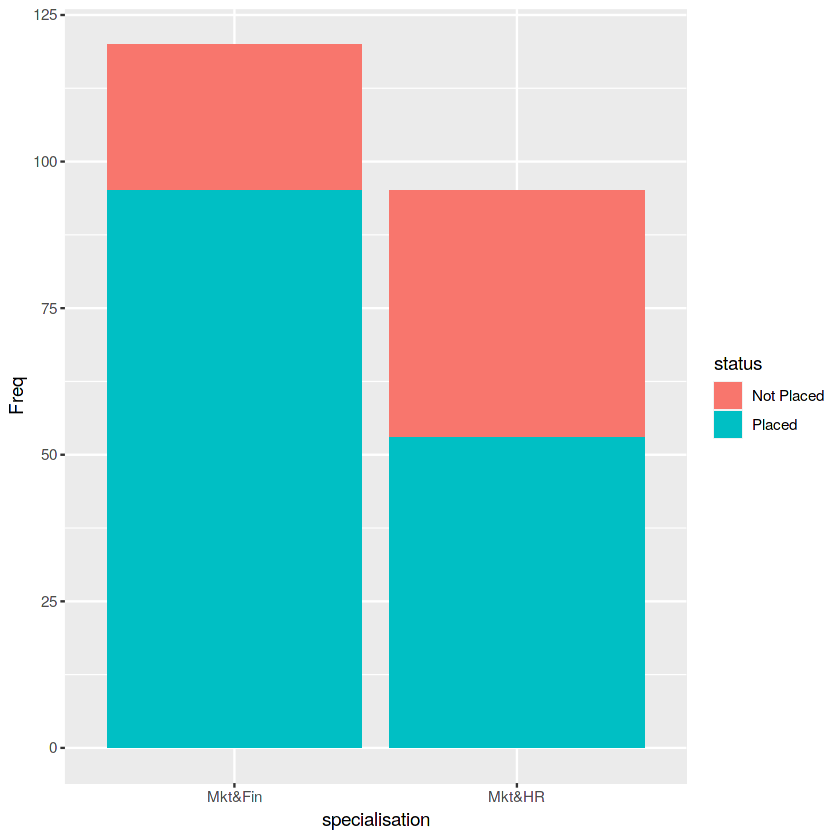

In [14]:
tab3 <- xtabs(~gender+specialisation+status, placement.df) # 3-way crosstabs
tab3
tab4 <- ftable(tab3)
tab4
df_tab4 <- as.data.frame(tab4)
df_tab4
ggplot(df_tab4, aes(x=specialisation, y = Freq)) +
  geom_bar(aes(fill = status), stat = "identity")

# Assess the normality - Visual methods

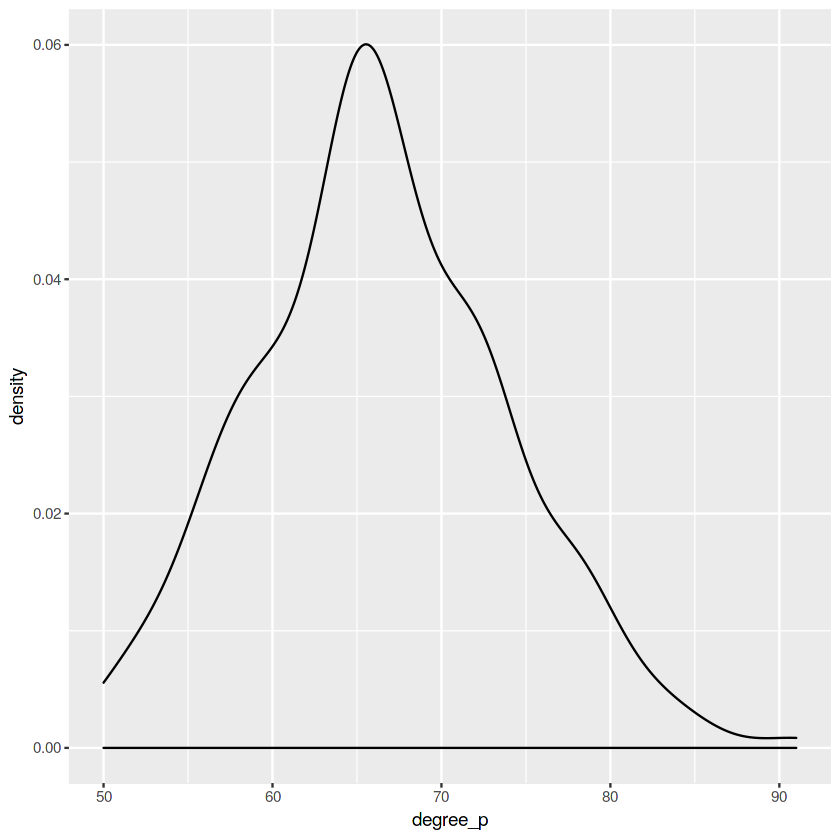

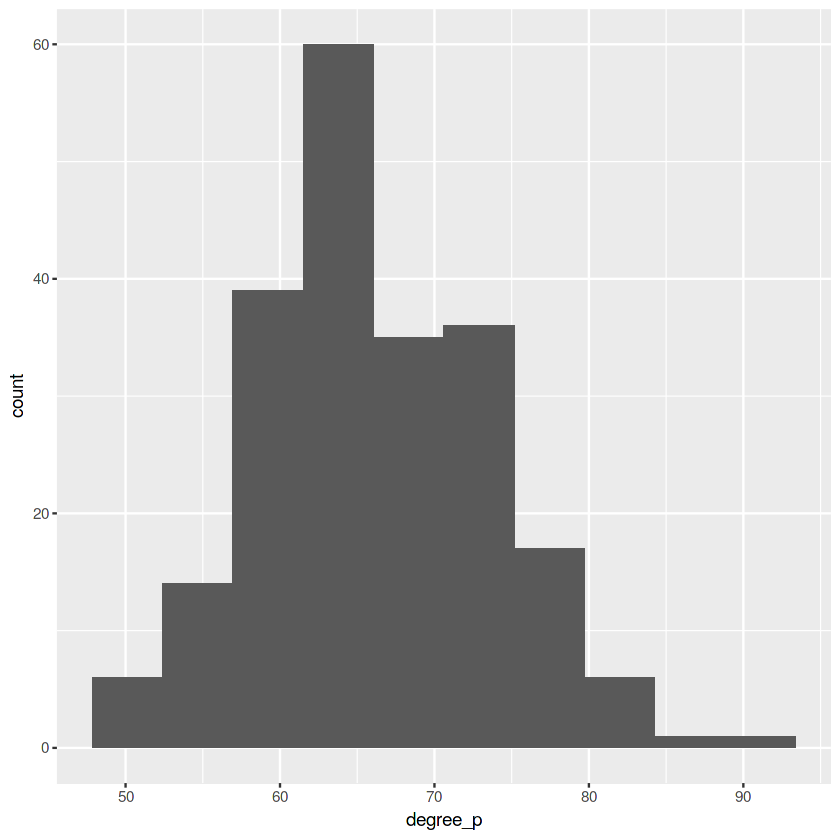

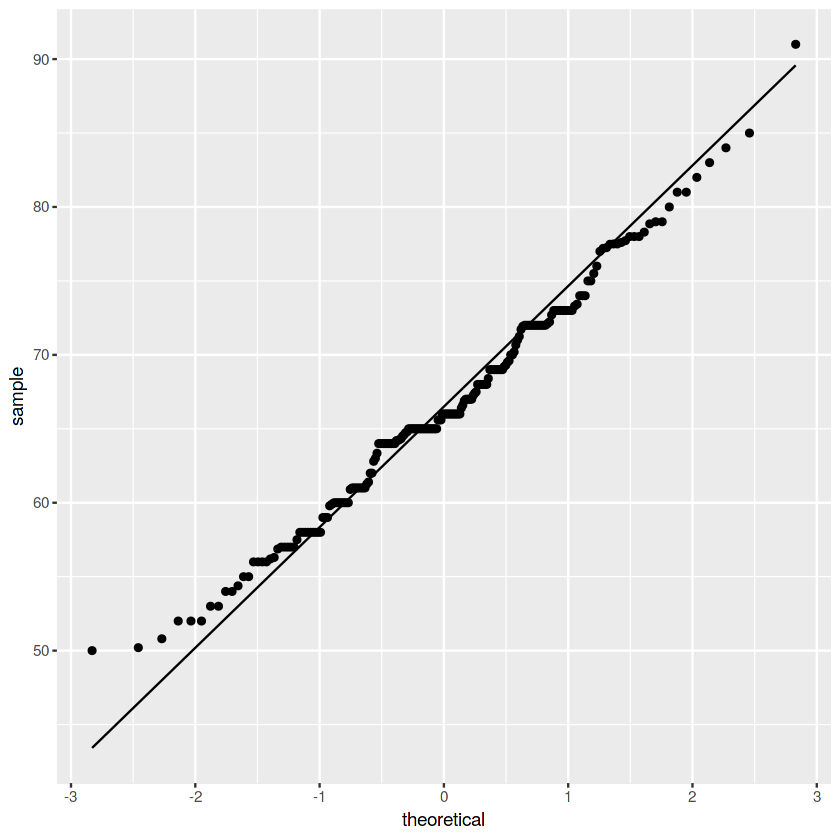

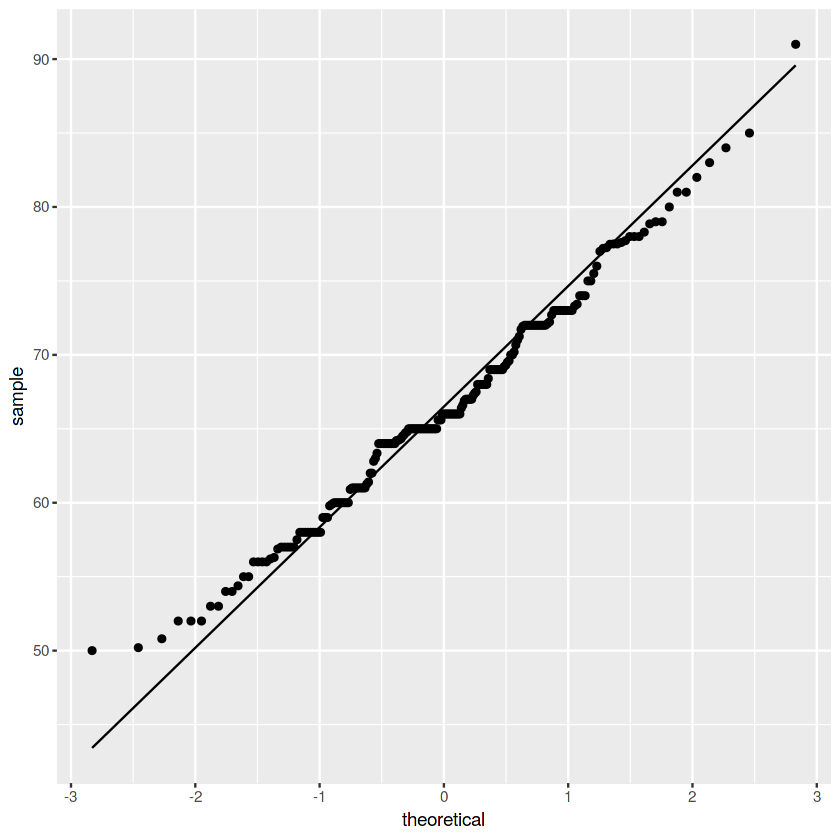

In [15]:
ggplot(placement.df) + geom_density(aes(degree_p)) # density plot
ggplot(placement.df) + geom_histogram(aes(degree_p), bins = 10) # histogram
qqbase <- ggplot(placement.df, aes(sample=degree_p))
qqbase + geom_qq() + geom_qq_line() # qq plot
qqbase + stat_qq() + stat_qq_line() # alternative


# Correlation test

[1] 0.4023638

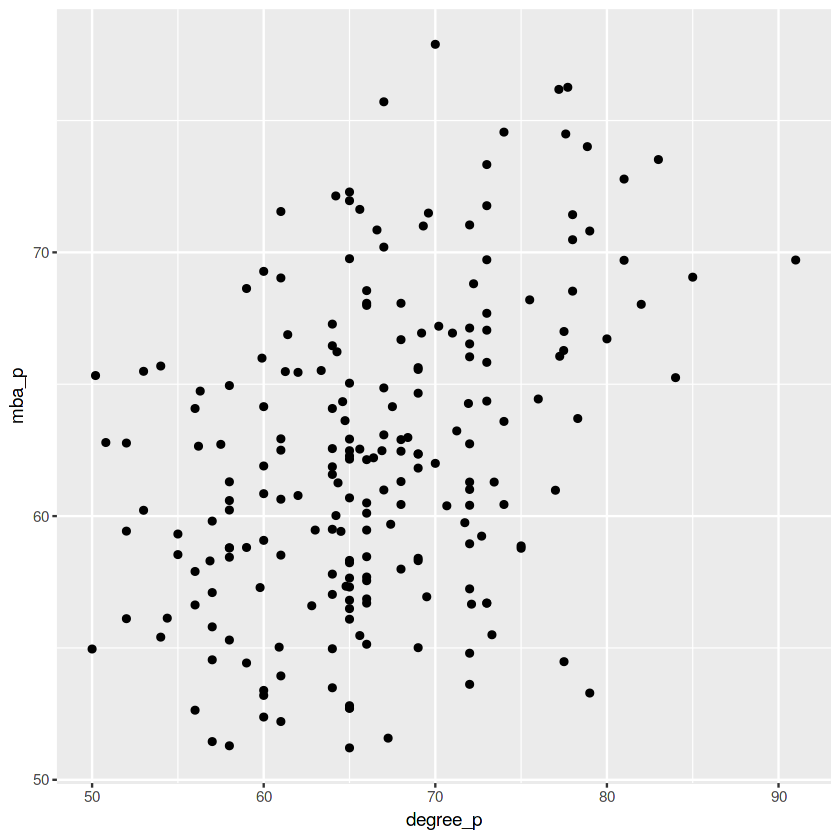

In [16]:

ggplot(placement.df, aes(degree_p, mba_p)) + geom_point()
cor(placement.df$degree_p, placement.df$mba_p) 



# Pearson correlation test

In [17]:
cor.test(placement.df$degree_p, placement.df$mba_p)


	Pearson's product-moment correlation

data:  placement.df$degree_p and placement.df$mba_p
t = 6.4145, df = 213, p-value = 8.993e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2838415 0.5087761
sample estimates:
      cor 
0.4023638 


Note: p < 0.05, we can conclude the variables are significantly correlated

# One-sample t-test
Select a sample of size 100

In [18]:
set.seed(25)
mysample <-  sample_n(placement.df, size = 100)
# We want to prove that the average degree_p differs from 60% (two-tailed test)
#H0=60
t.test(mysample$degree_p, mu = 60, alternative = "two.sided")
 


	One Sample t-test

data:  mysample$degree_p
t = 8.4526, df = 99, p-value = 2.549e-13
alternative hypothesis: true mean is not equal to 60
95 percent confidence interval:
 64.57186 67.37674
sample estimates:
mean of x 
  65.9743 


Note: p < 0.05,  We can conclude that the mean degree_p is significantly different from 60%

# Two-sample t-test (two tail)
create two samples based on gender


In [19]:
set.seed(25)
malesample <- placement.df %>% filter(gender == "M") %>% sample_n(size = 50)
femalesample <- placement.df %>% filter(gender == "F") %>% sample_n(size = 50)
# Is there any significant difference between male and female percentage?
t.test(malesample$degree_p, femalesample$degree_p, var.equal = T) # default two.sided


	Two Sample t-test

data:  malesample$degree_p and femalesample$degree_p
t = -3.2861, df = 98, p-value = 0.00141
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.684915 -1.897885
sample estimates:
mean of x mean of y 
  64.1054   68.8968 


Note: p < 0.05,  We can conclude that the mean degree_p is significantly different  between the two groups

# Two-sample t-test (one tail)
create two samples based on gender

In [20]:
set.seed(50)
malesample1 <- placement.df %>% filter(gender == "M") %>% sample_n(size = 75)
femalesample1 <- placement.df %>% filter(gender == "F") %>% sample_n(size = 75)
# We want to prove that the average percentage of male is less than that of female
#H0: mm >= mf
t.test(malesample1$degree_p, femalesample1$degree_p, var.equal = T, alternative = "less")


	Two Sample t-test

data:  malesample1$degree_p and femalesample1$degree_p
t = -2.0796, df = 148, p-value = 0.01964
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
       -Inf -0.5171545
sample estimates:
mean of x mean of y 
 65.38373  67.91787 


# One-way ANOVA
we want to check whether type of degree had any significant impact on the average MBA %

In [21]:
myaov1 <-  aov(mba_p ~ degree_t, data = placement.df)
summary.aov(myaov1)



             Df Sum Sq Mean Sq F value Pr(>F)
degree_t      2    116   58.13    1.72  0.182
Residuals   212   7166   33.80               

Note: p >= 0.05,  We can conclude that the mean MBA % under different degree type are same

# Diagnostic Checking
*Homogeneity of variance*

In [22]:
bartlett.test(mba_p ~ degree_t, data = placement.df)


	Bartlett test of homogeneity of variances

data:  mba_p by degree_t
Bartlett's K-squared = 0.15907, df = 2, p-value = 0.9235


Null hypothesis is there is homogeneity of variances across groups

# One-way ANOVA with diagnostics
We want to check whether type of degree had any significant impact on the average salary

In [23]:
myaov2 <-  aov(salary ~ degree_t, data = placement.df)
summary.aov(myaov2)
# Note: p >= 0.05,  We can conclude that the mean salary under different degree type are same
# Diagnostic Checking
# Homogeneity of variance
bartlett.test(salary ~ degree_t, data = placement.df)
# Null hypothesis is there is homogeneity of variances across groups

             Df    Sum Sq   Mean Sq F value Pr(>F)
degree_t      2 3.822e+10 1.911e+10   2.224  0.112
Residuals   145 1.246e+12 8.591e+09               
67 observations deleted due to missingness


	Bartlett test of homogeneity of variances

data:  salary by degree_t
Bartlett's K-squared = 2.5268, df = 2, p-value = 0.2827


# Normality assumption

In [24]:
shapiro.test(myaov2$residuals)
# Normality assumption is violated


	Shapiro-Wilk normality test

data:  myaov2$residuals
W = 0.68511, p-value < 2.2e-16


# Chi-square test of independence

In [25]:

table(placement.df$degree_t, placement.df$status)
chi_degpla <- chisq.test(placement.df$degree_t, placement.df$status)
chi_degpla


           
            Not Placed Placed
  Comm&Mgmt         43    102
  Others             6      5
  Sci&Tech          18     41

Warning message in chisq.test(placement.df$degree_t, placement.df$status):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  placement.df$degree_t and placement.df$status
X-squared = 2.969, df = 2, p-value = 0.2266


Note: p >= 0.05,  We retain the null